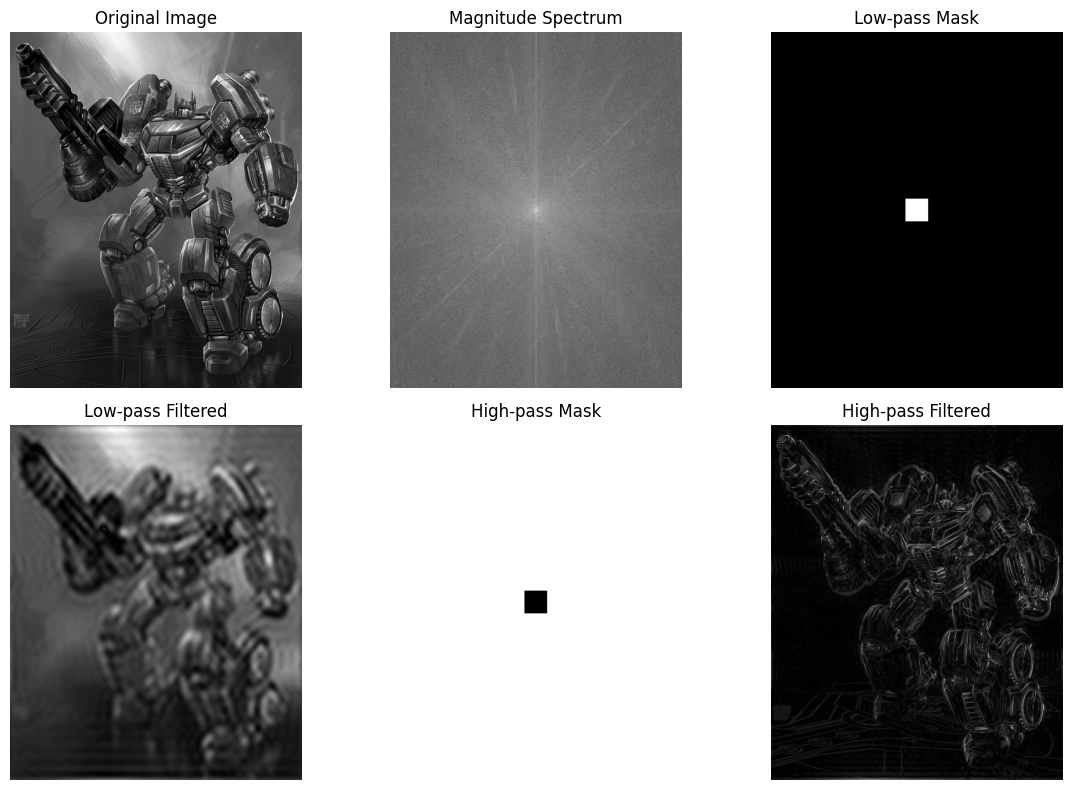

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/CV Images/CV Sample image.jpg', 0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

mask_low = np.zeros((rows, cols), np.uint8)
r = 30
mask_low[crow-r:crow+r, ccol-r:ccol+r] = 1

mask_high = np.ones((rows, cols), np.uint8)
mask_high[crow-r:crow+r, ccol-r:ccol+r] = 0

fshift_low = fshift * mask_low
fshift_high = fshift * mask_high

f_ishift_low = np.fft.ifftshift(fshift_low)
img_low = np.fft.ifft2(f_ishift_low)
img_low = np.abs(img_low)

f_ishift_high = np.fft.ifftshift(fshift_high)
img_high = np.fft.ifft2(f_ishift_high)
img_high = np.abs(img_high)

plt.figure(figsize=(12, 8))
plt.subplot(231), plt.imshow(img, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(232), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum'), plt.axis('off')
plt.subplot(233), plt.imshow(mask_low*255, cmap='gray'), plt.title('Low-pass Mask'), plt.axis('off')
plt.subplot(234), plt.imshow(img_low, cmap='gray'), plt.title('Low-pass Filtered'), plt.axis('off')
plt.subplot(235), plt.imshow(mask_high*255, cmap='gray'), plt.title('High-pass Mask'), plt.axis('off')
plt.subplot(236), plt.imshow(img_high, cmap='gray'), plt.title('High-pass Filtered'), plt.axis('off')
plt.tight_layout()
plt.show()